In [514]:
import numpy as np

from tqdm import tqdm

import pandas as pd

from tinygrad.tensor import Tensor
from tinygrad.nn import Linear
from tinygrad.nn.optim import SGD
from tinygrad.state import get_parameters


import matplotlib.pyplot as plt
%matplotlib inline

In [552]:
dataset = pd.read_csv("./datasets/Salary_Data.csv")
print(dataset)
dataset = dataset.to_numpy()

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [617]:
print(dataset.shape)
print(dataset.max(), dataset.min())
print(dataset[:,0])
print(dataset[:,1])

dataset[:,0].shape, dataset[:,1].shape

(30, 2)
122391.0 1.1
[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


((30,), (30,))

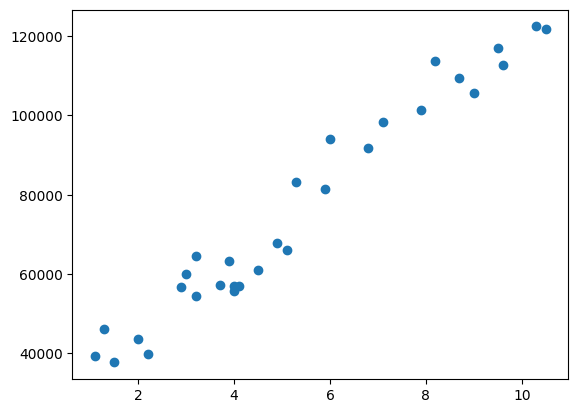

In [432]:
plt.scatter(dataset[:,0], dataset[:,1])

In [618]:
X = Tensor([dataset[:,0]])
y = Tensor([dataset[:,1]])
X.shape, y.shape

((1, 30), (1, 30))

In [619]:
X.numpy(), y.numpy()

(array([[ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
          4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
          7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]], dtype=float32),
 array([[ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
          54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
          61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
          98273., 101302., 113812., 109431., 105582., 116969., 112635.,
         122391., 121872.]], dtype=float32))

In [630]:
#X.unsqueeze(dim=0).transpose().dot(y).numpy()
X[0, 0].numpy(), y[0, 0].numpy()
X.squeeze().dot(y).numpy(), (X*y).numpy()

(array([ 6271275. ,  7365077. ,  6014322. ,  6937885. ,  6358625.5,
         9028735. ,  9587910. ,  8678533. , 10272534. ,  9115928. ,
        10076949. ,  8893564. ,  9078946. ,  9098710. ,  9741094. ,
        10829317. , 10525024. , 13244228. , 12969264. , 14974036. ,
        14623038. , 15664718. , 16147538. , 18141632. , 17443302. ,
        16829770. , 18644856. , 17954018. , 19509128. , 19426398. ],
       dtype=float32),
 array([[  43277.3  ,   60066.496,   56596.5  ,   87050.   ,   87760.2  ,
          164261.81 ,  180450.   ,  174224.   ,  206224.   ,  211599.3  ,
          246550.2  ,  223176.   ,  227828.   ,  234032.1  ,  274999.5  ,
          332896.22 ,  336747.9  ,  440366.4  ,  480041.72 ,  563640.   ,
          623818.44 ,  697738.3  ,  800285.8  ,  933258.4  ,  952049.7  ,
          950238.   , 1111205.5  , 1081296.   , 1260627.4  , 1279656.   ]],
       dtype=float32))

In [632]:
(X.squeeze()*y.squeeze()).numpy()

array([  43277.3  ,   60066.496,   56596.5  ,   87050.   ,   87760.2  ,
        164261.81 ,  180450.   ,  174224.   ,  206224.   ,  211599.3  ,
        246550.2  ,  223176.   ,  227828.   ,  234032.1  ,  274999.5  ,
        332896.22 ,  336747.9  ,  440366.4  ,  480041.72 ,  563640.   ,
        623818.44 ,  697738.3  ,  800285.8  ,  933258.4  ,  952049.7  ,
        950238.   , 1111205.5  , 1081296.   , 1260627.4  , 1279656.   ],
      dtype=float32)

In [648]:
class testNet:
    def __init__(self):
        self.weight = Tensor.uniform(1)
        self.bias = Tensor.uniform(1)
                         
    def forward(self, x):
        return (self.weight*x)+self.bias

def mse(y, ypred):
    return (((y-ypred)**2)).mean()

In [676]:
model = testNet()
opt = SGD([model.weight, model.bias], lr=0.001)

print(f"Params: {model.weight.numpy()=}, {model.bias.numpy()=}")

Params: model.weight.numpy()=array([-0.18231761], dtype=float32), model.bias.numpy()=array([0.4498384], dtype=float32)


In [658]:
model.forward(X).numpy()

array([[1.269605 , 1.3766325, 1.48366  , 1.7512288, 1.8582563, 2.2328527,
        2.2863665, 2.393394 , 2.393394 , 2.6609626, 2.76799  , 2.8215039,
        2.8215039, 2.8750176, 3.0890727, 3.3031278, 3.410155 , 3.5171828,
        3.8382652, 3.891779 , 4.319889 , 4.48043  , 4.9085407, 5.0690813,
        5.33665  , 5.4971914, 5.76476  , 5.8182745, 6.19287  , 6.299898 ]],
      dtype=float32)

In [880]:
def train():
    Tensor.training = True
    
    losses = []
    for i in range(100):
        out = model.forward(X)
    
        loss = mse(out, y)
        losses.append(loss.numpy())

        opt.zero_grad()
    
        loss.backward()
    
        opt.step()

    plt.plot(losses)

    print("Weight:", model.weight.numpy())
    print("Bias:", model.bias.numpy())


def eval():
    Tensor.training = False
    
    out = Tensor(model.forward(X).numpy(), requires_grad=False).numpy()
    loss = mse(out, y.numpy())
    print(f"{loss=}")
    print(out)
    plt.scatter(X.numpy(), out)
    plt.scatter(X.numpy(), y.numpy())

Weight: [9610.056]
Bias: [24713.385]


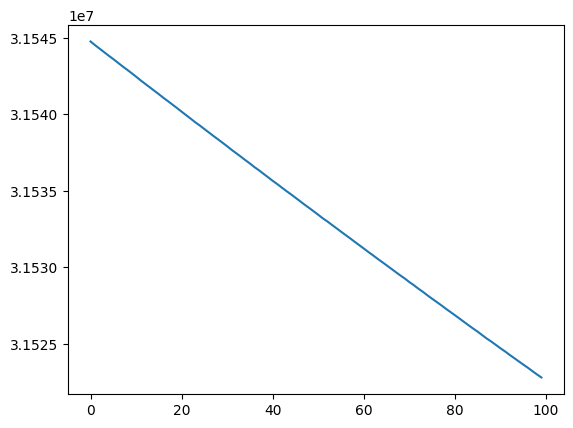

In [878]:
train()

loss=31522556.0
[[ 35284.445  37206.457  39128.47   43933.496  45855.508  52582.547
   53543.555  55465.562  55465.562  60270.594  62192.6    63153.61
   63153.61   64114.61   67958.63   71802.66   73724.664  75646.68
   81412.71   82373.72   90061.766  92944.77  100632.82  103515.836
  108320.87  111203.88  116008.914 116969.92  123696.96  125618.97 ]]


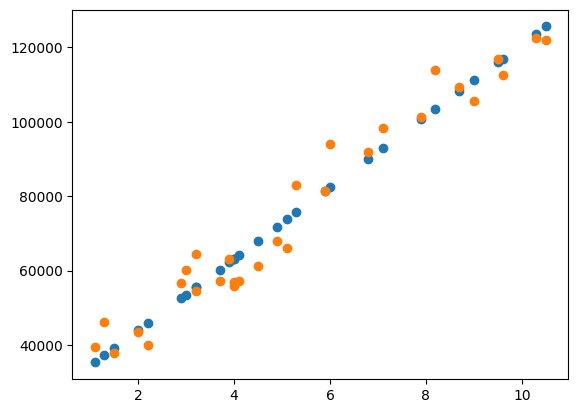

In [881]:
eval()